In [1]:
!pip install --upgrade pip
!pip install tensorflow==2.20.0 keras==3.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 15.7 MB/s  0:00:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.0 MB/s  0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [tensorflow]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.

In [2]:
!pip install gdown

In [3]:
!gdown --id 1avh2UeCvgAn4jbJ7xWrv1urpr8_X91Gu


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1avh2UeCvgAn4jbJ7xWrv1urpr8_X91Gu
From (redirected): https://drive.google.com/uc?id=1avh2UeCvgAn4jbJ7xWrv1urpr8_X91Gu&confirm=t&uuid=1859f0ae-f67a-4517-b6aa-31b3aa3934b4
To: /content/datasetjunto.zip
100% 52.2M/52.2M [00:00<00:00, 100MB/s] 


In [4]:
!unzip datasetjunto.zip -d content/

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: content/tristeza/16593.jpg  
  inflating: content/tristeza/16599.jpg  
  inflating: content/tristeza/16601.jpg  
  inflating: content/tristeza/16602.jpg  
  inflating: content/tristeza/16606.jpg  
  inflating: content/tristeza/16607.jpg  
  inflating: content/tristeza/16612.jpg  
  inflating: content/tristeza/16622.jpg  
  inflating: content/tristeza/16631.jpg  
  inflating: content/tristeza/16635.jpg  
  inflating: content/tristeza/16647.jpg  
  inflating: content/tristeza/16651.jpg  
  inflating: content/tristeza/16663.jpg  
  inflating: content/tristeza/16668.jpg  
  inflating: content/tristeza/16683.jpg  
  inflating: content/tristeza/16687.jpg  
  inflating: content/tristeza/16689.jpg  
  inflating: content/tristeza/16690.jpg  
  inflating: content/tristeza/16691.jpg  
  inflating: content/tristeza/16694.jpg  
  inflating: content/tristeza/16705.jpg  
  inflating: content/tristeza/16717.jpg  
  inflating: co

In [5]:
!mkdir -p /content/train


In [6]:
!mv /content/content/* /content/train


In [8]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dir_entrenamiento = "/content/train"
nombres_clases = ['alegria', 'enojo', 'miedo', 'neutral', 'tristeza']
objetivo = 7000

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    brightness_range=[0.7, 1.3],
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

for clase in nombres_clases:
    path_clase = os.path.join(dir_entrenamiento, clase)
    archivos = [f for f in os.listdir(path_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    total_actual = len(archivos)
    faltantes = objetivo - total_actual
    print(f"{clase}: {total_actual} imágenes, faltan {faltantes} para llegar a {objetivo}")

    i = 0
    while faltantes > 0:
        # Seleccionar aleatoriamente una imagen existente
        archivo = np.random.choice(archivos)
        img_path = os.path.join(path_clase, archivo)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (48, 48))  # Asegurarse que todas tengan el mismo tamaño
        img = img.reshape((1, 48, 48, 1))  # Batch de 1 para datagen

        # Generar imagen aumentada
        for batch in datagen.flow(img, batch_size=1):
            nueva_img = batch[0].reshape(48, 48)
            # Guardar la nueva imagen
            nuevo_nombre = f"{os.path.splitext(archivo)[0]}_aug_{i}.png"
            cv2.imwrite(os.path.join(path_clase, nuevo_nombre), nueva_img)
            i += 1
            faltantes -= 1
            if faltantes <= 0:
                break


alegria: 8318 imágenes, faltan -1318 para llegar a 7000
enojo: 3869 imágenes, faltan 3131 para llegar a 7000
miedo: 7877 imágenes, faltan -877 para llegar a 7000
neutral: 5313 imágenes, faltan 1687 para llegar a 7000
tristeza: 5150 imágenes, faltan 1850 para llegar a 7000


In [9]:
for clase in nombres_clases:
    print(clase, len(os.listdir(os.path.join(dir_entrenamiento, clase))))


alegria 8318
enojo 7000
miedo 7877
neutral 7000
tristeza 7000


In [11]:
import os
from collections import Counter

dir_entrenamiento = "/content/train"
nombres_clases = ['alegria', 'enojo', 'miedo', 'neutral', 'tristeza']

conteo = {}
for clase in nombres_clases:
    path_clase = os.path.join(dir_entrenamiento, clase)
    archivos = [f for f in os.listdir(path_clase) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    conteo[clase] = len(archivos)

print("=== Número de imágenes por clase ===")
for clase, cantidad in conteo.items():
    print(f"{clase}: {cantidad}")


=== Número de imágenes por clase ===
alegria: 8318
enojo: 7000
miedo: 7877
neutral: 7000
tristeza: 7000


Found 37195 files belonging to 5 classes.
Using 35336 files for training.
Found 37195 files belonging to 5 classes.
Using 1859 files for validation.
Epoch 1/250


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1105/1105 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.3319 - loss: 1.7070 - val_accuracy: 0.5083 - val_loss: 1.1925 - learning_rate: 1.0000e-04
Epoch 2/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.4560 - loss: 1.3351 - val_accuracy: 0.5455 - val_loss: 1.0798 - learning_rate: 1.0000e-04
Epoch 3/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.4955 - loss: 1.2353 - val_accuracy: 0.5960 - val_loss: 0.9975 - learning_rate: 1.0000e-04
Epoch 4/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5265 - loss: 1.1703 - val_accuracy: 0.6181 - val_loss: 0.9834 - learning_rate: 1.0000e-04
Epoch 5/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5422 - loss: 1.1260 - val_accuracy: 0.6337 - val_loss: 0.9375 - learning_rate: 1.0000e-04
Epoch 6/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5681 - loss: 1.0817 - val_accuracy: 0.6654 - val_loss: 0.8869 - learning_rate: 1.0000e-04
Epoch 7/250
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 39s

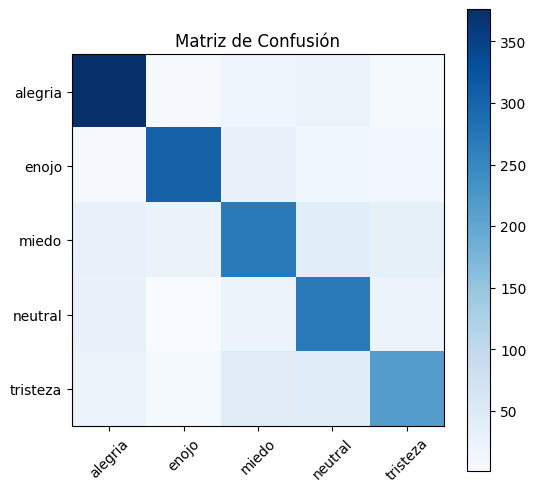

In [12]:
# === Importar librerías ===
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import datetime, os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# === Parámetros ===
ancho_imagen = 48
alto_imagen = 48
tamanio_lote = 32
nombres_clases = ['alegria', 'enojo', 'miedo', 'neutral', 'tristeza']
num_clases = len(nombres_clases)
epocas = 250
seed = 123

# === Rutas dataset ===
dir_entrenamiento = "/content/train"

# === Cargar dataset con valid_split ===
entrenamiento = tf.keras.utils.image_dataset_from_directory(
    dir_entrenamiento,
    labels="inferred",
    label_mode="categorical",
    image_size=(alto_imagen, ancho_imagen),
    batch_size=tamanio_lote,
    color_mode="grayscale",
    shuffle=True,
    validation_split=0.05,
    subset="training",
    seed=seed
)

validacion = tf.keras.utils.image_dataset_from_directory(
    dir_entrenamiento,
    labels="inferred",
    label_mode="categorical",
    image_size=(alto_imagen, ancho_imagen),
    batch_size=tamanio_lote,
    color_mode="grayscale",
    shuffle=True,
    validation_split=0.05,
    subset="validation",
    seed=seed
)

# === Normalización 0-1 ===
normalizar = lambda x, y: (tf.cast(x, tf.float32)/255.0, y)
entrenamiento = entrenamiento.map(normalizar)
validacion = validacion.map(normalizar)

# === Data Augmentation ===
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

# === Modelo CNN Optimizado ===
modelo = Sequential([
    # Aumentación de datos
    data_augmentation,

    # Bloque 1
    Conv2D(32, (3,3), padding='same', input_shape=(alto_imagen, ancho_imagen,1)),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2,2)),
    Dropout(0.2),

    # Bloque 2
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2,2)),
    Dropout(0.2),

    # Bloque 3
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D((2,2)),
    Dropout(0.3),

    # Clasificación
    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(num_clases, activation='softmax')
])

# === Compilación ===
modelo.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir)

# === Entrenamiento ===
historial = modelo.fit(
    entrenamiento,
    validation_data=validacion,
    epochs=epocas,
    callbacks=[early_stop, reduce_lr, tensorboard_callback]
)

# === Guardar modelo ===
modelo.save("modelo_emociones_v7.keras")

# === Evaluación final ===
y_true = []
y_pred = []

for images, labels in validacion:
    preds = modelo.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("=== Reporte de clasificación ===")
print(classification_report(y_true, y_pred, target_names=nombres_clases))

# === Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title("Matriz de Confusión")
plt.xticks(ticks=np.arange(num_clases), labels=nombres_clases, rotation=45)
plt.yticks(ticks=np.arange(num_clases), labels=nombres_clases)
plt.colorbar()
plt.show()


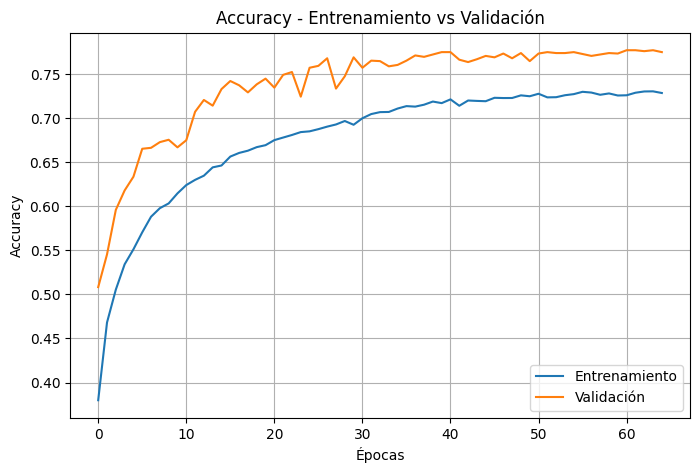

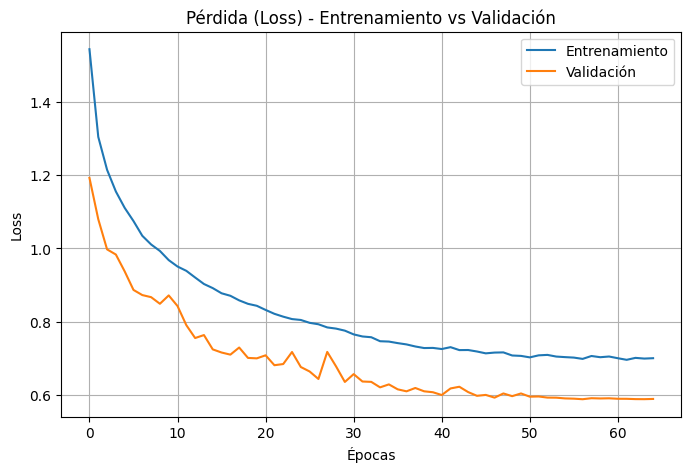

In [14]:
# ======== GRÁFICA DE ACCURACY ========
plt.figure(figsize=(8,5))
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Accuracy - Entrenamiento vs Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ======== GRÁFICA DE LOSS ========
plt.figure(figsize=(8,5))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida (Loss) - Entrenamiento vs Validación')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━

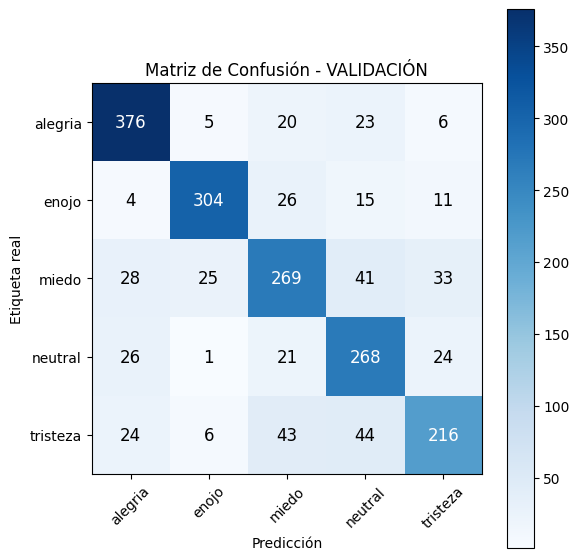


=== Reporte de clasificación (Validación) ===
              precision    recall  f1-score   support

     alegria       0.82      0.87      0.85       430
       enojo       0.89      0.84      0.87       360
       miedo       0.71      0.68      0.69       396
     neutral       0.69      0.79      0.73       340
    tristeza       0.74      0.65      0.69       333

    accuracy                           0.77      1859
   macro avg       0.77      0.77      0.77      1859
weighted avg       0.77      0.77      0.77      1859

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━

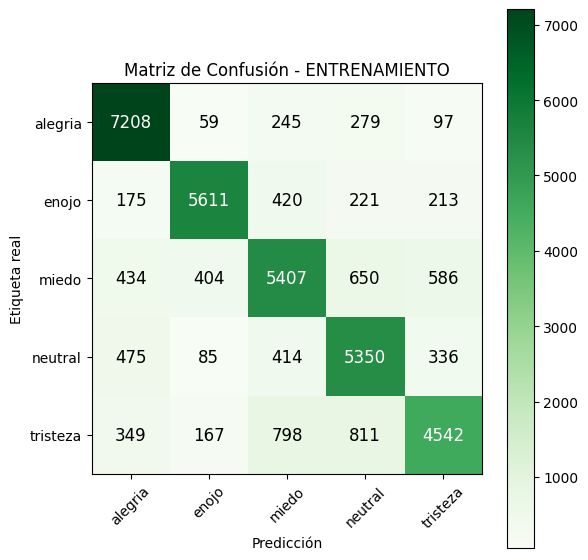


=== Reporte de clasificación (Entrenamiento) ===
              precision    recall  f1-score   support

     alegria       0.83      0.91      0.87      7888
       enojo       0.89      0.85      0.87      6640
       miedo       0.74      0.72      0.73      7481
     neutral       0.73      0.80      0.77      6660
    tristeza       0.79      0.68      0.73      6667

    accuracy                           0.80     35336
   macro avg       0.80      0.79      0.79     35336
weighted avg       0.80      0.80      0.79     35336



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title, cmap='Blues'):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # === Agregar números dentro de cada celda ===
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black",
                     fontsize=12)

    plt.ylabel('Etiqueta real')
    plt.xlabel('Predicción')
    plt.tight_layout()
    plt.show()


# ========= MATRIZ DE CONFUSIÓN VALIDACIÓN =========
y_true_val = []
y_pred_val = []

for images, labels in validacion:
    preds = modelo.predict(images)
    y_true_val.extend(np.argmax(labels.numpy(), axis=1))
    y_pred_val.extend(np.argmax(preds, axis=1))

cm_val = confusion_matrix(y_true_val, y_pred_val)

plot_confusion_matrix(cm_val, nombres_clases, "Matriz de Confusión - VALIDACIÓN", cmap='Blues')

print("\n=== Reporte de clasificación (Validación) ===")
print(classification_report(y_true_val, y_pred_val, target_names=nombres_clases))


# ========= MATRIZ DE CONFUSIÓN TRAIN =========
y_true_train = []
y_pred_train = []

for images, labels in entrenamiento:
    preds = modelo.predict(images)
    y_true_train.extend(np.argmax(labels.numpy(), axis=1))
    y_pred_train.extend(np.argmax(preds, axis=1))

cm_train = confusion_matrix(y_true_train, y_pred_train)

plot_confusion_matrix(cm_train, nombres_clases, "Matriz de Confusión - ENTRENAMIENTO", cmap='Greens')

print("\n=== Reporte de clasificación (Entrenamiento) ===")
print(classification_report(y_true_train, y_pred_train, target_names=nombres_clases))
